<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Linear%20Regression/Linear_Regression_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Vamos considerar para título de entimento, os pontos abaixo
import pandas as pd

dados = pd.DataFrame( 
                     { 'X' : [ 1, 2, 3, 4, 5 ] ,
                       'Y' : [ 1.3, 1.8, 3.5, 4, 4.6 ] }
                    )

dados.head()

,X,Y
0,1,1.3
1,2,1.8
2,3,3.5
3,4,4.0
4,5,4.6


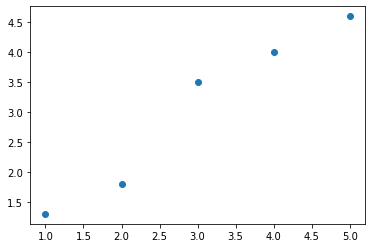

In [12]:
# Visualizando os pontos graficamente
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter( dados.X, dados.Y )

plt.show()

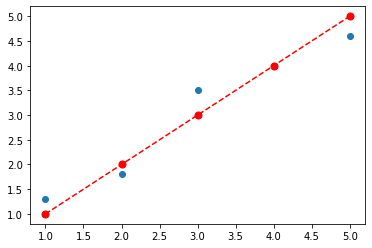

In [18]:
# Desenhando uma reta utilizando X = Y
dados['y_reta'] = dados.X

fix, ax = plt.subplots()

ax.scatter( dados.X, dados.Y )
ax.plot( dados.X, dados.y_reta, '--r' )
ax.scatter( dados.X, dados.y_reta, s=50, color='red' )

plt.show()

In [21]:
# Importando a regressão Linear
from sklearn.linear_model import LinearRegression

modelo = LinearRegression().fit( dados.X.values.reshape(-1, 1), dados.Y )

In [22]:
# Visualizando o coeficiente angular
modelo.coef_

array([0.88])

In [23]:
# Visualizando o coeficoente linear
modelo.intercept_

0.40000000000000036

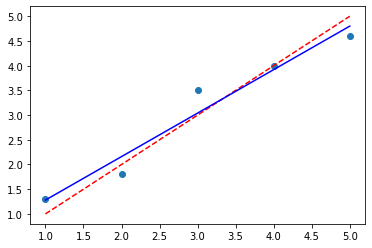

In [28]:
# y = ax + b

a = modelo.coef_[0]
b = modelo.intercept_

fix, ax = plt.subplots()

ax.scatter( dados.X, dados.Y )
ax.plot( dados.X, dados.y_reta, '--r' )
ax.plot( dados.X, ( a * dados.X + b ), '-b'  )
# ax.scatter( dados.X, dados.y_reta, s=50, color='red' )

plt.show()

In [31]:
# Fazenao a Previsão e adicionando na base
dados['y_predito'] = modelo.predict( dados.X.values.reshape( -1, 1 ) )
dados

,X,Y,y_reta,y_predito
0,1,1.3,1,1.28
1,2,1.8,2,2.16
2,3,3.5,3,3.04
3,4,4.0,4,3.92
4,5,4.6,5,4.80


In [33]:
# Calculando o erro da reta VERMELHA e da REGRESSÃO
dados['erro'] = ( dados.Y - dados.y_reta ) ** 2
dados['erro_regressao'] = ( dados.Y - dados.y_predito ) ** 2
dados

,X,Y,y_reta,y_predito,erro,erro_regressao
0,1,1.3,1,1.28,0.09,0.0004
1,2,1.8,2,2.16,0.04,0.1296
2,3,3.5,3,3.04,0.25,0.2116
3,4,4.0,4,3.92,0.00,0.0064
4,5,4.6,5,4.80,0.16,0.0400


In [37]:
# Verificando qual tem o MENOR erro MÉDIO
dados[ ['erro', 'erro_regressao']].mean()

erro              0.1080
erro_regressao    0.0776
dtype: float64

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print( mean_squared_error( dados.Y, dados.y_reta ) )
print( mean_squared_error( dados.Y, dados.y_predito ) )

print( mean_absolute_error( dados.Y, dados.y_reta ) )
print( mean_absolute_error( dados.Y, dados.y_predito ) )

0.10800000000000005
0.07760000000000003
0.2800000000000001
0.22400000000000003
